# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

(-1.5839585832348746, 93.85156045445399)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID={weather_api_key}&q="
city_name=[]
lat=[]
lon=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

record = 1
group = 1

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    query_url = url + city
    response = requests.get(query_url).json()
    try:
        print(f"Processing Record {record} of Set {group} | {city}")
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        if record > 50:
            record = 1
            group += 1
        else:
            record += 1
    except:
            print("City not found. Skipping...")
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | enid
Processing Record 3 of Set 1 | huarmey
Processing Record 4 of Set 1 | hun
Processing Record 5 of Set 1 | disna
Processing Record 6 of Set 1 | meyungs
City not found. Skipping...
Processing Record 6 of Set 1 | krasnoselkup
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | banda aceh
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | saint-leu
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | port alfr

Processing Record 18 of Set 4 | scarborough
Processing Record 19 of Set 4 | esperance
Processing Record 20 of Set 4 | longyearbyen
Processing Record 21 of Set 4 | casian
Processing Record 22 of Set 4 | aklavik
Processing Record 23 of Set 4 | bara
Processing Record 24 of Set 4 | castro
Processing Record 25 of Set 4 | maragogi
Processing Record 26 of Set 4 | hue
Processing Record 27 of Set 4 | avera
Processing Record 28 of Set 4 | cilegon
Processing Record 29 of Set 4 | hithadhoo
Processing Record 30 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 30 of Set 4 | sao filipe
Processing Record 31 of Set 4 | tomatlan
Processing Record 32 of Set 4 | jiuquan
Processing Record 33 of Set 4 | bethel
Processing Record 34 of Set 4 | norman wells
Processing Record 35 of Set 4 | ribeira grande
Processing Record 36 of Set 4 | eskasem
City not found. Skipping...
Processing Record 36 of Set 4 | san quintin
Processing Record 37 of Set 4 | riyadh
Processing Record 38 of Set 4 | sorva

Processing Record 34 of Set 7 | bubaque
Processing Record 35 of Set 7 | gucheng
Processing Record 36 of Set 7 | sobolevo
Processing Record 37 of Set 7 | matara
Processing Record 38 of Set 7 | sadat
Processing Record 39 of Set 7 | santa rosa
Processing Record 40 of Set 7 | crestview
Processing Record 41 of Set 7 | manado
Processing Record 42 of Set 7 | camacari
Processing Record 43 of Set 7 | kattivakkam
Processing Record 44 of Set 7 | adelanto
Processing Record 45 of Set 7 | khanpur
Processing Record 46 of Set 7 | ponta delgada
Processing Record 47 of Set 7 | rancho palos verdes
Processing Record 48 of Set 7 | naze
Processing Record 49 of Set 7 | zhaoyang
Processing Record 50 of Set 7 | havoysund
Processing Record 51 of Set 7 | murray bridge
Processing Record 1 of Set 8 | pangnirtung
Processing Record 2 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 8 | togur
Processing Record 3 of Set 8 | tateyama
Processing Record 4 of Set 8 | springfield
Pro

Processing Record 6 of Set 11 | brownsville
Processing Record 7 of Set 11 | bilma
Processing Record 8 of Set 11 | vestmannaeyjar
Processing Record 9 of Set 11 | celendin
Processing Record 10 of Set 11 | susehri
Processing Record 11 of Set 11 | mareeba
Processing Record 12 of Set 11 | aflu
City not found. Skipping...
Processing Record 12 of Set 11 | turayf
Processing Record 13 of Set 11 | riverton
Processing Record 14 of Set 11 | mogadishu
Processing Record 15 of Set 11 | ornskoldsvik
Processing Record 16 of Set 11 | mega
Processing Record 17 of Set 11 | norrtalje
Processing Record 18 of Set 11 | berezovyy
Processing Record 19 of Set 11 | ixtapa
Processing Record 20 of Set 11 | cazaje
City not found. Skipping...
Processing Record 20 of Set 11 | ust-nera
Processing Record 21 of Set 11 | kobryn
Processing Record 22 of Set 11 | sal rei
Processing Record 23 of Set 11 | palauig
Processing Record 24 of Set 11 | lambarene
Processing Record 25 of Set 11 | mulanje
Processing Record 26 of Set 11 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
cities_df = pd.DataFrame({"City": city_name,
                         "Lat": lat,
                         "Lng": lon,
                         "Max Temp": max_temp,
                         "Humidity": humidity,
                         "Cloudiness": cloudiness,
                         "Wind Speed": wind_speed,
                         "Country": country,
                         "Date": date,
                         })

cities_df.to_csv("../output_data/cities.csv", index=True, index_label="City ID", header=True)

cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.60,50,40,6.91,AR,1620793601
1,Enid,36.3956,-97.8784,48.00,87,1,6.91,US,1620793807
2,Huarmey,-10.0681,-78.1522,65.80,85,4,7.72,PE,1620793808
3,Hūn,29.1268,15.9477,78.75,26,0,4.07,LY,1620793808
4,Disna,55.5680,28.1971,57.81,83,17,9.69,BY,1620793809
...,...,...,...,...,...,...,...,...,...
565,Surskoye,54.4821,46.7214,65.98,63,70,10.07,RU,1620794113
566,Nome,64.5011,-165.4064,51.01,81,1,14.97,US,1620793959
567,Irbit,57.6705,63.0710,65.03,46,74,6.17,RU,1620793935
568,Äänekoski,62.6946,25.8180,57.20,67,0,4.61,FI,1620794113


In [21]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.224476,16.753669,62.490754,69.385965,47.215789,7.313632,1.620794e+09
std,33.418165,90.137219,17.395950,21.649918,38.716818,4.902285,9.017908e+01
min,-54.800000,-179.166700,17.600000,10.000000,0.000000,0.380000,1.620794e+09
25%,-7.766650,-65.590025,50.400000,57.000000,5.000000,3.537500,1.620794e+09
50%,22.215800,22.075000,62.600000,73.000000,40.000000,6.140000,1.620794e+09
75%,49.145800,96.157150,77.000000,87.000000,90.000000,9.867500,1.620794e+09
max,78.218600,178.416700,98.260000,100.000000,100.000000,35.680000,1.620794e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

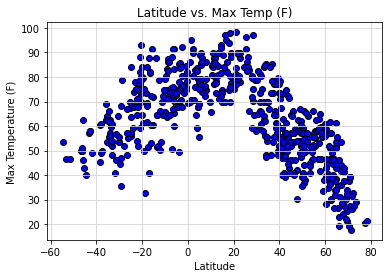

In [28]:
plt.scatter(cities_df["Lat"],cities_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (05/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

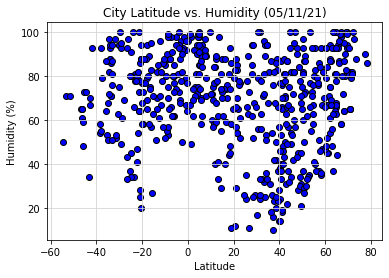

In [30]:
plt.scatter(cities_df["Lat"],cities_df["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (05/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

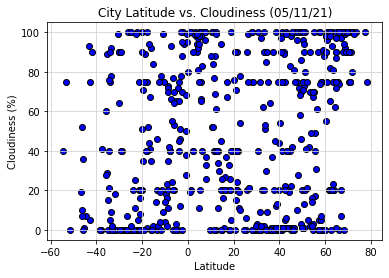

In [32]:
plt.scatter(cities_df["Lat"],cities_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (05/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

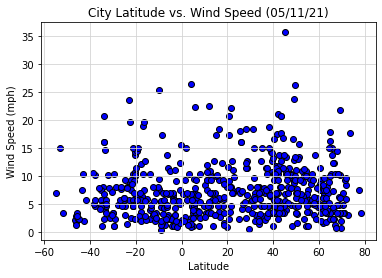

In [33]:
plt.scatter(cities_df["Lat"],cities_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (05/11/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [35]:
northern_df = cities_df.loc[cities_df["Lat"] >=0,:]
southern_df = cities_df.loc[cities_df["Lat"] <0,:]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.60,50,40,6.91,AR,1620793601
2,Huarmey,-10.0681,-78.1522,65.80,85,4,7.72,PE,1620793808
6,Pisco,-13.7000,-76.2167,64.40,82,20,2.30,PE,1620793810
7,Rikitea,-23.1203,-134.9692,77.99,78,25,23.58,PF,1620793762
9,Puerto Ayora,-0.7393,-90.3518,75.99,92,28,5.01,EC,1620793811
...,...,...,...,...,...,...,...,...,...
549,Vao,-22.6667,167.4833,74.91,78,99,19.60,NC,1620794107
554,Singaraja,-8.1120,115.0882,86.14,65,42,3.31,ID,1620794109
557,Djambala,-2.5447,14.7533,67.66,90,0,1.92,CG,1620794110
559,Santa Maria,-29.6842,-53.8069,44.60,100,0,1.14,BR,1620794111


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is -0.8278867948204613


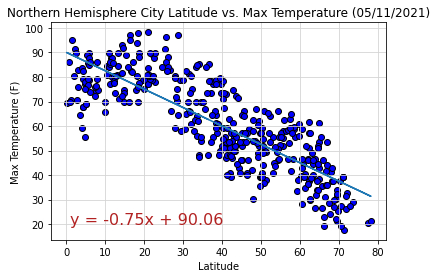

In [106]:
#regression calc
aa_slope, aa_int, aa_r, aa_p, aa_std_err = linregress(
    northern_df["Lat"], northern_df["Max Temp"])
aa_fit = aa_slope * northern_df["Lat"] + aa_int
line_eq = "y = " + str(round(aa_slope,2)) + "x + " + str(round(aa_int,2))


plt.scatter(northern_df["Lat"],northern_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.plot(northern_df["Lat"],aa_fit,"-")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (05/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(1,20), fontsize=16,color="firebrick")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/Fig5.png")
print(f"The R Value is {aa_r}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is 0.6110870274020447


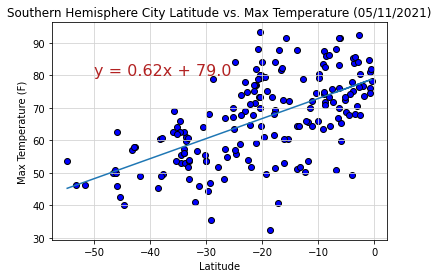

In [107]:
#regression calc
aa_slope, aa_int, aa_r, aa_p, aa_std_err = linregress(
    southern_df["Lat"], southern_df["Max Temp"])
aa_fit = aa_slope * southern_df["Lat"] + aa_int
line_eq = "y = " + str(round(aa_slope,2)) + "x + " + str(round(aa_int,2))


plt.scatter(southern_df["Lat"],southern_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.plot(southern_df["Lat"],aa_fit,"-")
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (05/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(-50,80), fontsize=16,color="firebrick")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/Fig6.png")
print(f"The R Value is {aa_r}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is 0.014762660212066256


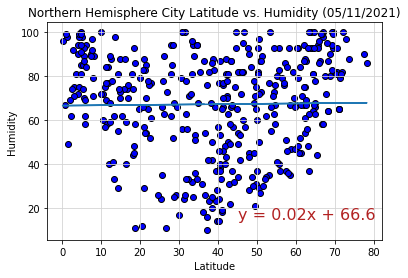

In [108]:
#regression calc
aa_slope, aa_int, aa_r, aa_p, aa_std_err = linregress(
    northern_df["Lat"], northern_df["Humidity"])
aa_fit = aa_slope * northern_df["Lat"] + aa_int
line_eq = "y = " + str(round(aa_slope,2)) + "x + " + str(round(aa_int,2))


plt.scatter(northern_df["Lat"],northern_df["Humidity"],edgecolors="black",facecolors="blue")
plt.plot(northern_df["Lat"],aa_fit,"-")
plt.title("Northern Hemisphere City Latitude vs. Humidity (05/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(45,15), fontsize=16,color="firebrick")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/Fig7.png")
print(f"The R Value is {aa_r}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is 0.21164888518500155


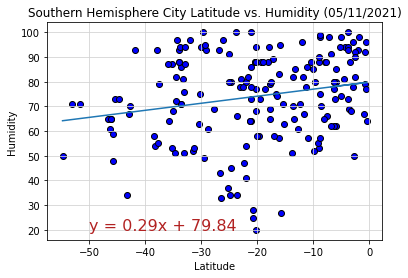

In [109]:
#regression calc
aa_slope, aa_int, aa_r, aa_p, aa_std_err = linregress(
    southern_df["Lat"], southern_df["Humidity"])
aa_fit = aa_slope * southern_df["Lat"] + aa_int
line_eq = "y = " + str(round(aa_slope,2)) + "x + " + str(round(aa_int,2))


plt.scatter(southern_df["Lat"],southern_df["Humidity"],edgecolors="black",facecolors="blue")
plt.plot(southern_df["Lat"],aa_fit,"-")
plt.title("Southern Hemisphere City Latitude vs. Humidity (05/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,20), fontsize=16,color="firebrick")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/Fig8.png")
print(f"The R Value is {aa_r}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is 0.1134813538912431


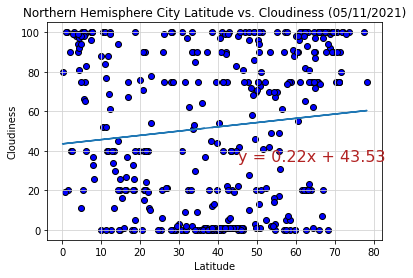

In [110]:
#regression calc
aa_slope, aa_int, aa_r, aa_p, aa_std_err = linregress(
    northern_df["Lat"], northern_df["Cloudiness"])
aa_fit = aa_slope * northern_df["Lat"] + aa_int
line_eq = "y = " + str(round(aa_slope,2)) + "x + " + str(round(aa_int,2))


plt.scatter(northern_df["Lat"],northern_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.plot(northern_df["Lat"],aa_fit,"-")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (05/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(45,35), fontsize=16,color="firebrick")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/Fig9.png")
print(f"The R Value is {aa_r}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is 0.19281175876792847


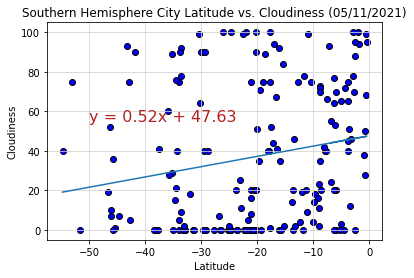

In [111]:
#regression calc
aa_slope, aa_int, aa_r, aa_p, aa_std_err = linregress(
    southern_df["Lat"], southern_df["Cloudiness"])
aa_fit = aa_slope * southern_df["Lat"] + aa_int
line_eq = "y = " + str(round(aa_slope,2)) + "x + " + str(round(aa_int,2))


plt.scatter(southern_df["Lat"],southern_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.plot(southern_df["Lat"],aa_fit,"-")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (05/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-50,55), fontsize=16,color="firebrick")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/Fig10.png")
print(f"The R Value is {aa_r}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is 0.01877580321773171


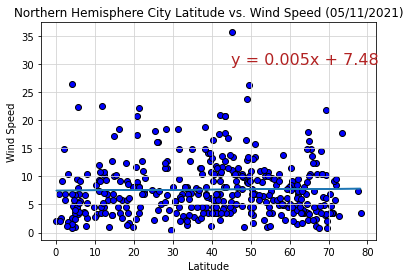

In [112]:
#regression calc
aa_slope, aa_int, aa_r, aa_p, aa_std_err = linregress(
    northern_df["Lat"], northern_df["Wind Speed"])
aa_fit = aa_slope * northern_df["Lat"] + aa_int
line_eq = "y = " + str(round(aa_slope,3)) + "x + " + str(round(aa_int,2))


plt.scatter(northern_df["Lat"],northern_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.plot(northern_df["Lat"],aa_fit,"-")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (05/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(45,30), fontsize=16,color="firebrick")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/Fig11.png")
print(f"The R Value is {aa_r}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is -0.014672003937720867


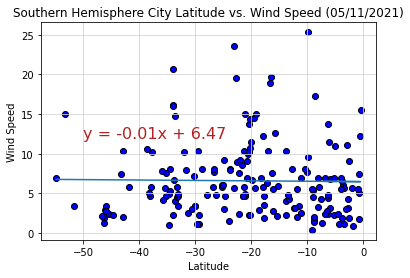

In [113]:
#regression calc
aa_slope, aa_int, aa_r, aa_p, aa_std_err = linregress(
    southern_df["Lat"], southern_df["Wind Speed"])
aa_fit = aa_slope * southern_df["Lat"] + aa_int
line_eq = "y = " + str(round(aa_slope,2)) + "x + " + str(round(aa_int,2))


plt.scatter(southern_df["Lat"],southern_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.plot(southern_df["Lat"],aa_fit,"-")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (05/11/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-50,12), fontsize=16,color="firebrick")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#plt.savefig("../output_data/Fig12.png")
print(f"The R Value is {aa_r}")
plt.show()